In [27]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
import pathlib
path=pathlib.Path(r"C:\Users\ollie\OneDrive\Documents\Data Science\DataSets\Employment predictors\Analysis\Data Linking- Employment.xlsx")
#print(path)
df=pd.read_excel(path)

# Print the first five rows
#df.head()
current_columns=df.columns
new_columns=[i[:15] for i in current_columns]
print(new_columns)

# initializing lists
#test_keys = ["Rash", "Kil", "Varsha"]
#test_values = [1, 4, 5]

 
# using dictionary comprehension
# to convert lists to dictionary
renamed_cols= {current_columns[i]: new_columns[i] for i in range(len(current_columns))}
df=df.rename(columns=renamed_cols)
df.head()

['LA', 'lookup_NOMIS_di', 'LA_Code', 'MSOA_code', '3dig', 'Unemployment_ra', 'L1,_L2_and_L3_H', 'L4,_L5_and_L6_L', 'L7_Intermediate', 'L8_and_L9_Small', 'L10_and_L11_Low', 'L12_Semi-routin', 'L13_Routine_occ', 'L14.1_and_L14.2', 'L15_Full-time_s', 'Ofsted_average', 'Claimant_rate', 'Death_rate', 'Satisfaction', 'Anxiety', 'worthwhile', 'AHAH', 'Social_Mobility', 'median_age']


,LA,lookup_NOMIS_di,LA_Code,MSOA_code,3dig,Unemployment_ra,"L1,_L2_and_L3_H","L4,_L5_and_L6_L",L7_Intermediate,L8_and_L9_Small,...,L15_Full-time_s,Ofsted_average,Claimant_rate,Death_rate,Satisfaction,Anxiety,worthwhile,AHAH,Social_Mobility,median_age
0,Fife,NaN,S12000015,NaN,15,3.656458,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Glasgow City,NaN,S12000046,NaN,46,4.423184,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Lanarkshire,NaN,S12000044,NaN,44,3.729897,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Perth and Kinross,NaN,S12000024,NaN,24,2.495574,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Orkney Islands,NaN,S12000023,NaN,23,2.814595,NaN,NaN,NaN,NaN,...,NaN,NaN,1.6,NaN,8.17,2.88,8.31,NaN,NaN,48.52


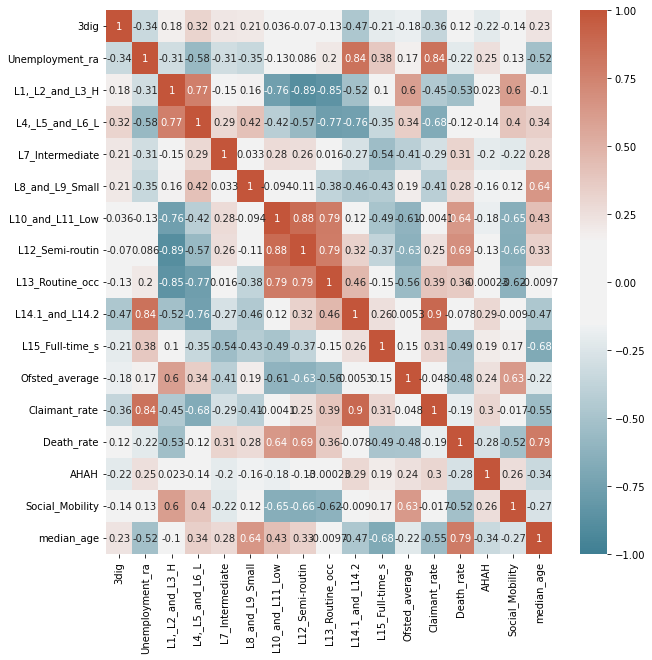

In [31]:
import seaborn as sns
#create heat map here:
#get table of variable correlations
corr_grid = df.corr()
#color palette
palette = sns.diverging_palette(220, 20, sep=40, as_cmap=True)
#plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, center=0, cmap=palette, vmin=-1, vmax=1, annot=True,ax=ax)


plt.show()

#plot regression lines on scatter plot here:


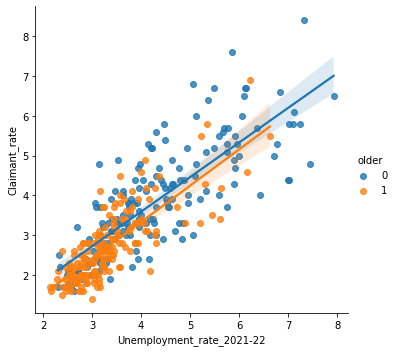

In [16]:
df["Ofsted"]=df["Ofsted_average"].round(1)
df["Ofsted_sum"]=[1 if df["Ofsted"].iloc[i] > 4.9 else 0 for i in range(len(df["Ofsted"]))]
df['older']=[1 if df["median_age"].iloc[i]> df["median_age"].mean() else 0 for i in range(len(df["Ofsted"]))]
sns.lmplot(x='Unemployment_rate_2021-22', y='Claimant_rate', hue="older",data=df)
#plt.plot(family.housing, results.params[0]+results.params[1]*1+results.params[3]*family.housing+results.params[2]*10, color='red',linewidth=5, label='food=10')
#plt.plot(family.housing, results.params[0]+results.params[1]*1+results.params[3]*family.housing+results.params[2]*100, color='orange',linewidth=5, label='food=100')
#plt.plot(family.housing, results.params[0]+results.params[1]*1+results.params[3]*family.housing+results.params[2]*200, color='yellow',linewidth=5, label='food=200')
#plt.legend()
plt.show()

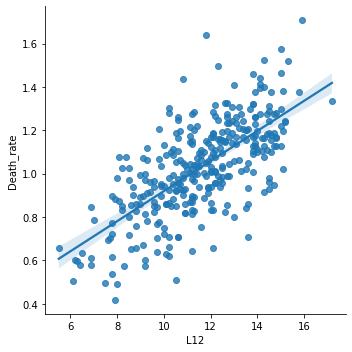

In [5]:
sns.lmplot(x='L12', y='Death_rate', data=df)
plt.show()

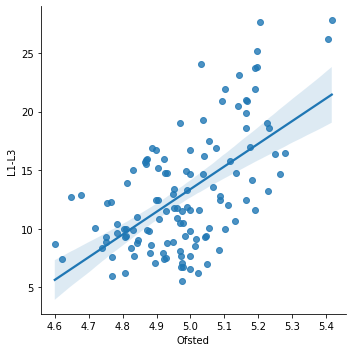

In [6]:
sns.lmplot(x='Ofsted', y='L1-L3', data=df)
plt.show()

In [31]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('Benefit_claim ~ worthwhile + L14 + Ofsted + Unemployment_21_22 + Death_rate', df)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:          Benefit_claim   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     91.24
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.05e-38
Time:                        16:34:11   Log-Likelihood:                -118.43
No. Observations:                 123   AIC:                             248.9
Df Residuals:                     117   BIC:                             265.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.2306      4

# look at better health data, get more ofsted for more schools

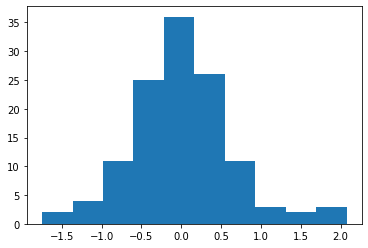

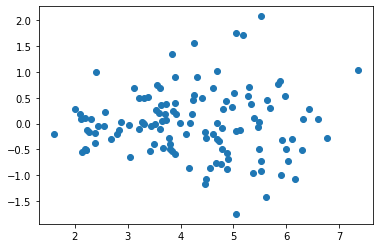

<Figure size 432x288 with 0 Axes>

In [32]:

# Calculate fitted values
fitted_values = results.predict(df)

# Calculate residuals
residuals = df.Benefit_claim - fitted_values

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()



In [12]:
#get some standard code in to clean out non ints/nas etc.
df.Anxiety=pd.to_numeric(df.Anxiety,errors="coerce")
df.worthwhile=pd.to_numeric(df.worthwhile,errors="coerce")
# Create a scatter plot of time vs age
plt.scatter(df.Anxiety, df.Benefit_claim)

# Show then clear plot
plt.show()
#plt.clf()



AttributeError: 'DataFrame' object has no attribute 'Anxiety'

In [ ]:
# Predict amount of time on website for 40 year old
pred40 = results.params[0] + results.params[1]*40
print('predicted time on website for a 40 year old: ', pred40)

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
print(results.params)

# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)